# Text Classification using a TF-IDF Matrix

### What is TF-IDF?
Term Frequency-Inverse Document Frequency (TF-IDF) determines how important a word is by weighing its frequency of occurrence in the document and computing how often the same word occurs in other documents. If a word occurs many times in a particular document but not in others, then it might be highly relevant to that particular document and is therefore assigned more importance

TF-IDF is short for term frequency-inverse document frequency, is a numerical statistic that is intended to 
reflect how important a word is to a document in a collection or corpus. It is often used as a weighting
factor in information retrieval and texmining. ^
The TF-IDF value increases proportionally to the number of times a word appears in the documentbut is 
offset by the frequency of the word in the corpus, which helps to adjust for the fact that some words 
appear more frequently in gen

The first part is TF, called term frequency. This simply means the number of times the word occur in document divided by the total number of words in the document.

The second part is IDF, which stands for ‘inverse document frequency’, interpreted like inversed number of documents, in which the term we’re interested in occurs.

tf(t,d) is the term frequency is the number of times the term appears in the document.

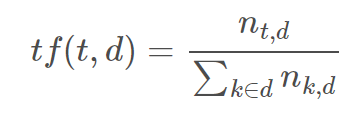

Where, t is term and  d document.

idf(t,D) is the document frequency is the number of documents 'd' that contain term 't'.

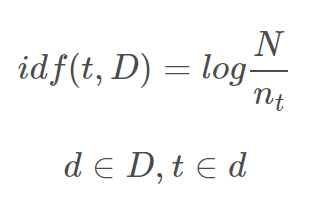

where  N is the total number of documents and  nt is the number of documents containing the term  t

The TF-IDF vector,

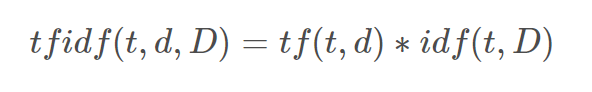


## Smoothing
An idf is constant per corpus for a word. A smoothened version, adding 1 to denominator is applied to avoid division by 0 (occurs when term is not present in corpora). The idea of idf is to weight down the frequent terms while scale up the rare ones, assuming more frequent ones are not always important ones. So, smoothened idf equation is

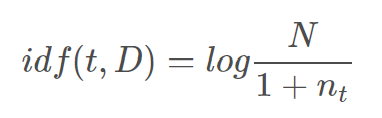

NB : smoothing is set True as default in scikit learn tfidf vectorizer:2015.t

In [ ]:
### Exploring different NLP models for sentiment classification
1. NLP: Preprocessing + TF IDF Matrix
2. Model Selection: Loop through multiple classifiers for selection
3. Metrics: Classification Repor


This dataset was created for the paper, ‘From Group to Individual Labels using Deep Features’, Kotzias et. al,. KDD 

Algorithm and working check from blog: https://www.capitalone.com/tech/machine-learning/understanding-tf-idf/  2015.t

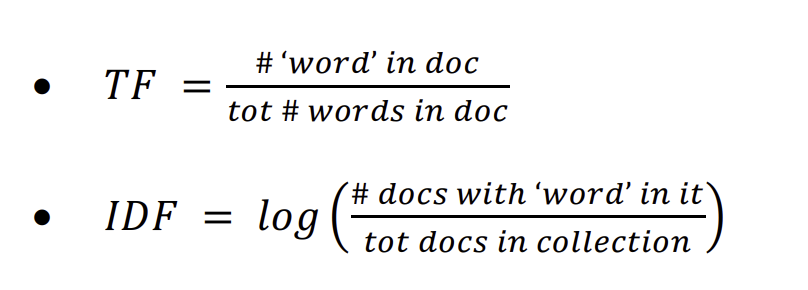

## Dataset
Download the dataset from here: https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences

It contains sentences labeled with positive (1) or negative (0) sentiment, extracted from reviews of products, movies, and restaurants.

In [1]:
# Importing the libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sb
import seaborn as sns

In [2]:
# Importing dataset
yelp_ds = pd.read_csv('dataset/yelp_labelled.txt', sep ='\t', header = None, names = ['reviews', 'rating'])
amazon_ds = pd.read_csv('dataset/amazon_cells_labelled.txt', sep ='\t', header = None, names = ['reviews', 'rating'])
imdb_ds = pd.read_csv('dataset/imdb_labelled.txt', sep ='\t', header = None, names = ['reviews', 'rating'])

In [3]:
yelp_ds.head()

,reviews,rating
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
dataset = pd.concat([yelp_ds, amazon_ds, imdb_ds], ignore_index = True)

In [5]:
dataset

,reviews,rating
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
2743,I just got bored watching Jessice Lange take h...,0
2744,"Unfortunately, any virtue in this film's produ...",0
2745,"In a word, it is embarrassing.",0
2746,Exceptionally bad!,0


In [6]:
# Manually setting the rating for 2 reviews with NaN values
dataset.fillna(1, inplace = True)

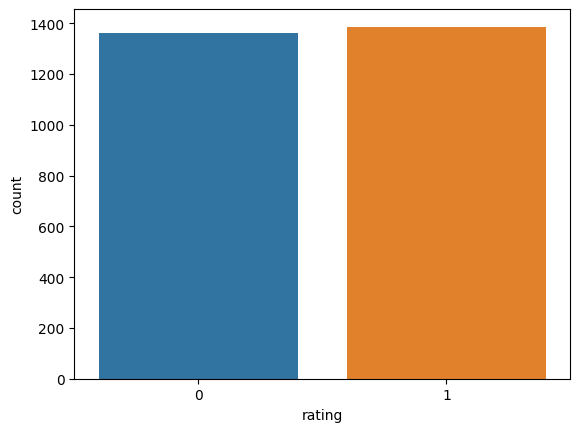

In [8]:
ax = sns.countplot(x="rating", data=dataset)

---------------------Part 1: NLP Preprocessing Techniques to the reviews. ---------------------------

In [9]:
!pip install nltk

In [10]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ankita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ankita\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Data Clensing
We are using custom functions to perform the following tasks. Cleaning up the data for modeling should be carried out carefully and with the help of subject matter experts, if possible. This cleaning is done completely based on observation, and can not be considered as a generic preprocessing step for all the NLP tasks. This preprocessing function ensures:

* Removing urls from tweet
* Removing html tags
* Removing punctuations
* Removing stopwords
* Removing emoji
* Lemmatization



In [11]:
## Cleaning data process 1:

import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer  
stop_words = stopwords.words('english')

lemmatizer = WordNetLemmatizer() 

def clean_text(text):
    
    text = text.lower()
    
    text = re.sub(r"[^a-zA-Z?.!,¿]+", " ", text) # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")

    text = re.sub(r"http\S+", "",text) #Removing URLs 
    #text = re.sub(r"http", "",text)
    
    html=re.compile(r'<.*?>') 
    
    text = html.sub(r'',text) #Removing html tags
    
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`" + '_'
    for p in punctuations:
        text = text.replace(p,'') #Removing punctuations
        
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    
    text = [lemmatizer.lemmatize(word) for word in text]
    
    text = " ".join(text) #removing stopwords
    
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) #Removing emojis
    
    return text

In [12]:
## Cleaning data process 2:
# Define a function for text preprocessing
def text_preprocess(ds: pd.Series) -> pd.Series:
    # Loop through each element in the Pandas Series
    for m in range(len(ds)):
        # Remove non-alphabetic characters and replace with spaces
        main_words = re.sub('[^a-zA-Z]', ' ', ds[m])
        
        # Convert text to lowercase and split into a list of words
        main_words = (main_words.lower()).split()
        
        # Remove stopwords from the list of words
        main_words = [w for w in main_words if not w in set(stopwords.words('english'))]
        
        # Initialize a WordNet lemmatizer
        lem = WordNetLemmatizer()
        
        # Lemmatize words in the list, keeping only those with length > 1
        main_words = [lem.lemmatize(w) for w in main_words if len(w) > 1]
        
        # Join the list of words back into a single string
        main_words = ' '.join(main_words)
        
        # Update the corresponding element in the Pandas Series with preprocessed text
        ds[m] = main_words
        
    # Return the modified Pandas Series with preprocessed text
    return ds

In [13]:
dataset['reviews'] = text_preprocess(dataset['reviews'])

C:\Users\Ankita\AppData\Local\Temp\ipykernel_2928\143423642.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[m] = main_words
C:\Users\Ankita\AppData\Local\Temp\ipykernel_2928\143423642.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[m] = main_words
C:\Users\Ankita\AppData\Local\Temp\ipykernel_2928\143423642.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[m] = main_words
C:\Users\Ankita\AppData\Local\Temp\ipykerne

# Count Vectorizer
The most basic and naive method of transforming words into vectors by counting occurrence of each word in each document. The output is a document-term matrix with each row representing a document and each column addressing a token (weight assigned to each token based on counting the occurence).

For example:

In [14]:
sample = dataset['reviews'].iloc[:2].values
sample

array(['wow loved place', 'crust good'], dtype=object)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer instance
count_vectorizer = CountVectorizer()

# Transform the text documents into a document-term matrix
wm = count_vectorizer.fit_transform(sample)

# Create names for documents (rows) and feature names (columns)
doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
feat_names = count_vectorizer.get_feature_names_out() 


# Create a DataFrame to display the document-term matrix
sample_df = pd.DataFrame(data=wm.toarray(), index=doc_names, columns=feat_names)
sample_df

,crust,good,loved,place,wow
Doc0,0,0,1,1,1
Doc1,1,1,0,0,0


In [16]:
# Word Cloud generator for the 3 datasets + complete dataset
# Corpus of all reviews to plot a BIG word cloud
corpus = " ".join(review for review in dataset.reviews)
yelp = ' '.join(review for review in yelp_ds.reviews)
amazon = ' '.join(review for review in amazon_ds.reviews)
imdb = ' '.join(review for review in imdb_ds.reviews)

In [17]:
imdb

'A very, very, very slow-moving, aimless movie about a distressed, drifting young man.   Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.   Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.   Very little music or anything to speak of.   The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.   The rest of the movie lacks art, charm, meaning... If it\'s about emptiness, it works I guess because it\'s empty.   Wasted two hours.   Saw the movie today and thought it was a good effort, good messages for kids.   A bit predictable.   Loved the casting of Jimmy Buffet as the science teacher.   And those baby owls were adorable.   The movie showed a lot of Florida at it\'s best, made it look very appealing.   The Songs Were The Best And The Muppets Were So Hilar

In [18]:
!pip install wordcloud

In [19]:
from PIL import Image
from wordcloud import WordCloud

In [20]:
def generateWordCloud(corpus: str, cmap: str) -> WordCloud:
    """
    Return a Word Cloud object generated from the corpus and color map parameter.
    """
    wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      colormap = cmap, max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      random_state = 0)

    wordcloud.generate(corpus)

    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.figure()

    return wordcloud

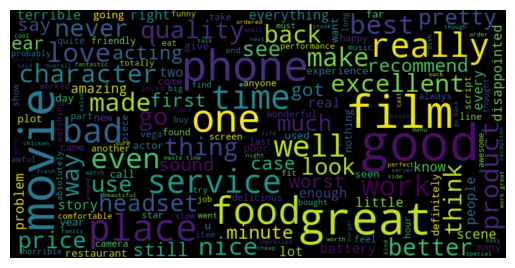

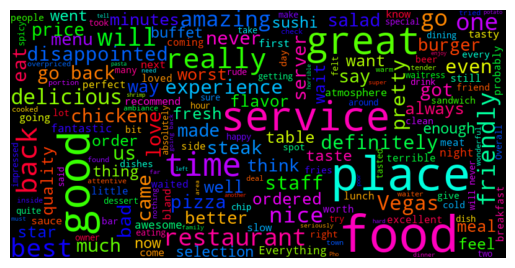

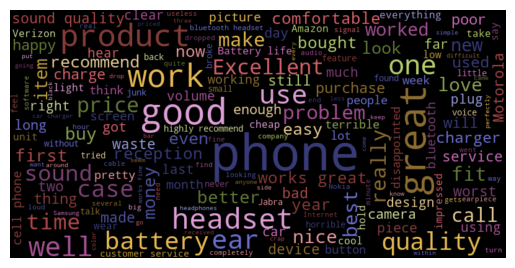

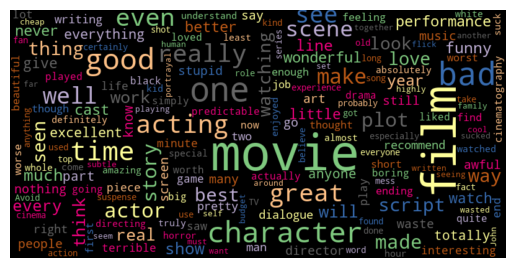

<Figure size 640x480 with 0 Axes>

In [21]:
generateWordCloud(corpus = corpus, cmap = 'viridis').to_file('dataset_wc.png')
generateWordCloud(corpus = yelp, cmap = 'hsv').to_file('yelp_wc.png')
generateWordCloud(corpus = amazon, cmap = 'tab20b').to_file('amazon_wc.png')
generateWordCloud(corpus = imdb, cmap = 'Accent').to_file('imdb_wc.png')

In [22]:
# Spliiting into X & y
X = dataset.iloc[:, 0].values
y = dataset.iloc[:, 1].values

In [23]:
# Building a TF IDF matrix out of the corpus of reviews
from sklearn.feature_extraction.text import TfidfVectorizer
td = TfidfVectorizer(max_features = 4500)
X = td.fit_transform(X).toarray()

In [24]:
# Splitting into training & test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    random_state = 0)

---------------------Part 2: Model Selection---------------------

In [25]:
# Classifiers
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

---------------------Part 4: Metrics---------------------

In [26]:
# Classification metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#from pprint import print

classification_report = classification_report(y_test, y_pred)

In [27]:
print('\n Accuracy: ', accuracy_score(y_test, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)


 Accuracy:  0.7927272727272727

Classification Report

               precision    recall  f1-score   support

           0       0.83      0.74      0.78       414
           1       0.76      0.85      0.80       411

    accuracy                           0.79       825
   macro avg       0.80      0.79      0.79       825
weighted avg       0.80      0.79      0.79       825



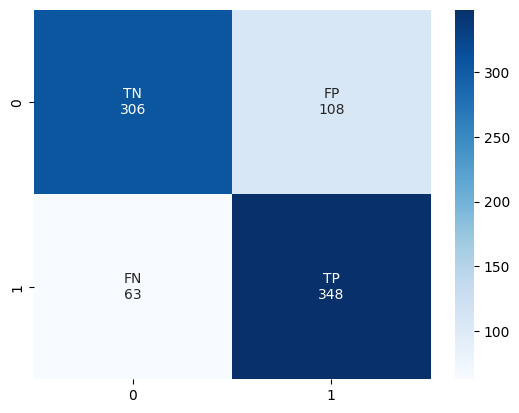

In [28]:
cnf_matrix = confusion_matrix(y_test,y_pred)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');

# Conclusion
TF-IDF (Term Frequency - Inverse Document Frequency) is a handy algorithm that uses the frequency of words to determine how relevant those words are to a given document. It’s a relatively simple but intuitive approach to weighting words, allowing it to act as a great jumping off point for a variety of tasks. This includes building search engines, summarizing documents, or other tasks in the information retrieval and machine learning domains.